Before starting this notebook up, please do the following so that everything functions well: 
1. Install a virtual env by running the following in the command line:
``` Python
python -m venv venv
```

2. Install packages using pip via command line:
``` Python
pip install -r requirements.txt
```

In [38]:
import requests
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from itertools import product
from tqdm import tqdm

In [58]:
def extract_nd_monthlies(choose_year: int, choose_month: int):
    """
    Given a year and month, extract and save MPR dataset
    Args: Month and Year lists
    Output: datframe with selected datasets months
    """
    # make sure that month is ##
    url = f"https://www.dmr.nd.gov/oilgas/mpr/{choose_year}_{choose_month:02d}.xlsx"

    response = requests.get(url=url)
    dataframe = pd.read_excel(response.content, header=0)

    # setting up process to store data
    current_dir = os.getcwd()
    save_path = f"{current_dir}/mpr_data/monthlies"
    os.makedirs(save_path, exist_ok=True)
    dataframe.to_excel(f"{save_path}/{choose_year}_{choose_month}.xlsx", index=False)

    return dataframe


In [64]:
def extract_mpr(start_yr: int = 2003, end_yr: int = 2026):
    """
    Function that tries to grab datasets and update master dataset 
    """
    datasets = []

    choose_years = list(range(start_yr, end_yr))
    choose_months = list(range(1, 13))
    date_permus = list(product(choose_years, choose_months))

    for date_permu in tqdm(date_permus): 
        try:
            temp_df = extract_nd_monthlies(choose_year=date_permu[0], choose_month=date_permu[1])
            datasets.append(temp_df)

        except:
            print(f"no data exists for {date_permu[0]}_{date_permu[1]}!")

    # now we want to combine all datasets into one master df
    master_df = pd.concat(datasets)

    # setting up where we wil be storing this dataset
    current_dir = os.getcwd()
    save_path = f"{current_dir}/mpr_data"
    os.makedirs(save_path, exist_ok=True)
    master_df.to_excel(f"{save_path}/full_data_{start_yr}_{end_yr}.xlsx", index=False)
    master_df = master_df.reset_index()

    return master_df



In [65]:
test_df = extract_mpr(start_yr=2025)

  0%|          | 0/12 [00:00<?, ?it/s]/var/folders/lv/_2pd__3j4tl2w9g39c7ybbs00000gn/T/ipykernel_30858/829379721.py:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataframe = pd.read_excel(response.content, header=0)
  8%|▊         | 1/12 [00:04<00:50,  4.61s/it]/var/folders/lv/_2pd__3j4tl2w9g39c7ybbs00000gn/T/ipykernel_30858/829379721.py:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataframe = pd.read_excel(response.content, header=0)
 17%|█▋        | 2/12 [00:09<00:48,  4.86s/it]/var/folders/lv/_2pd__3j4tl2w9g39c7ybbs00000gn/T/ipykernel_30858/829379721.py:11: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  dataframe = pd.read_excel(respons

no data exists for 2025_5!
no data exists for 2025_6!


 67%|██████▋   | 8/12 [00:19<00:04,  1.03s/it]

no data exists for 2025_7!
no data exists for 2025_8!


 83%|████████▎ | 10/12 [00:19<00:01,  1.70it/s]

no data exists for 2025_9!
no data exists for 2025_10!


 92%|█████████▏| 11/12 [00:19<00:00,  2.15it/s]

no data exists for 2025_11!


100%|██████████| 12/12 [00:19<00:00,  1.67s/it]

no data exists for 2025_12!


We have successfully create extraction functions in two parts
- Single Extraction function given a month and year
- Multiple Extraction function given a start and end year

Let's visualize our data and create some visualizing functions!

In [66]:
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86190 entries, 0 to 86189
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       86190 non-null  int64         
 1   ReportDate  86190 non-null  datetime64[ns]
 2   API_WELLNO  86190 non-null  int64         
 3   FileNo      86190 non-null  int64         
 4   Company     86190 non-null  object        
 5   WellName    86190 non-null  object        
 6   Quarter     86190 non-null  object        
 7   Section     86190 non-null  int64         
 8   Township    86190 non-null  int64         
 9   Range       86190 non-null  int64         
 10  County      86190 non-null  object        
 11  FieldName   86190 non-null  object        
 12  Pool        86190 non-null  object        
 13  Oil         85576 non-null  float64       
 14  Wtr         85576 non-null  float64       
 15  Days        85576 non-null  float64       
 16  Runs        86190 non-

In [67]:
print(test_df.head(10))

   index ReportDate      API_WELLNO  FileNo                      Company  \
0      0 2025-01-01  33053039010000   22023  GRAYSON MILL OPERATING, LLC   
1      1 2025-01-01  33053038990000   22021  GRAYSON MILL OPERATING, LLC   
2      2 2025-01-01  33053048330000   25091  GRAYSON MILL OPERATING, LLC   
3      3 2025-01-01  33053050010000   25645  GRAYSON MILL OPERATING, LLC   
4      4 2025-01-01  33053048340000   25092  GRAYSON MILL OPERATING, LLC   
5      5 2025-01-01  33053050000000   25644  GRAYSON MILL OPERATING, LLC   
6      6 2025-01-01  33053101460000   40272  GRAYSON MILL OPERATING, LLC   
7      7 2025-01-01  33053076280000   32709  GRAYSON MILL OPERATING, LLC   
8      8 2025-01-01  33053042390000   23319  GRAYSON MILL OPERATING, LLC   
9      9 2025-01-01  33053042400000   23320  GRAYSON MILL OPERATING, LLC   

              WellName Quarter  Section  Township  Range  ...    Pool     Oil  \
0        BILL 14-23 1H    SWSW       11       151    101  ...  BAKKEN   556.0   
1

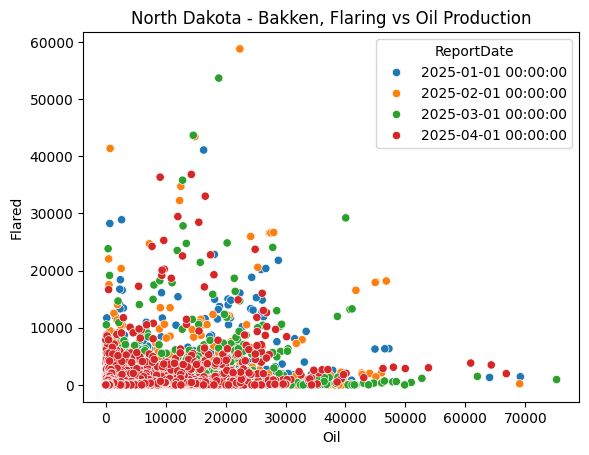

In [73]:
plt.figure()
sns.scatterplot(data=test_df, x="Oil", y="Flared", hue="ReportDate")
plt.title("North Dakota - Bakken, Flaring vs Oil Production")
plt.show()

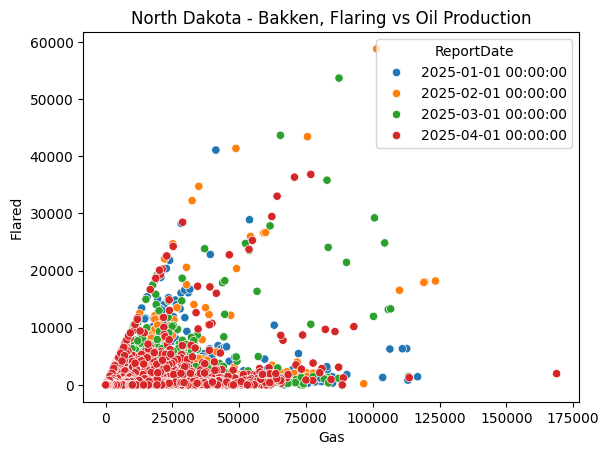

In [72]:
plt.figure()

sns.scatterplot(data=test_df, x="Gas", y="Flared", hue="ReportDate")

plt.title("North Dakota - Bakken, Flaring vs Oil Production")
plt.show()